In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import make_blobs
import seaborn as sns

Задание 1 <br>
`purchases_kg`: вес блоков с зерном в тоннах <br>
`purchases_v`: объем мешков в тоннах <br>
`success`: Продан/ не продан мешок <br><br>
Сформирую датасет из случайных данных при поиощи библиотеки sklearn.

,purchases_kg,purchases_v,success
0,42.163208,30.147942,0
1,49.296171,19.739473,0
2,42.384279,28.330711,1
3,39.988353,37.373604,0
4,41.584185,30.311778,1
...,...,...,...
995,42.344180,14.616825,0
996,52.904067,27.614801,1
997,41.165668,18.013817,0
998,43.197671,14.690796,1


<Axes: >

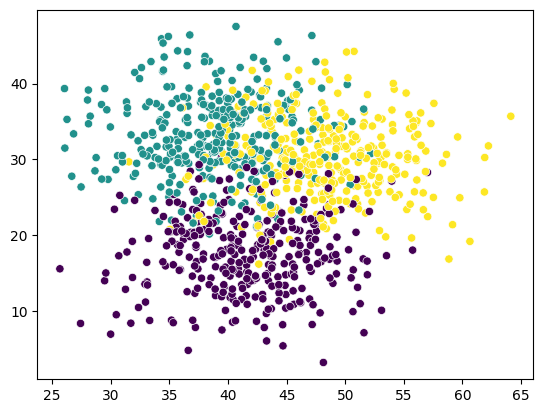

In [93]:
# Формирую датасет размером 1000 в диапазоне от 0 до 50 со значениями x и y и с заданным средним отклонением кластеров
# Из датасета формирую датафрейм, с которм собстенно и буду работать
data_group_1, y = make_blobs(n_samples=1000, center_box=(0,50), n_features=2, cluster_std=5.25)
data=pd.DataFrame({
    'purchases_kg': [item[0] for item in data_group_1],
    'purchases_v': [item[1] for item in data_group_1],
    'success': np.random.randint(0, 2, size=1000),
})
display(data)
sns.scatterplot(x=data_group_1[:, 0],  y=data_group_1[:, 1], c=y)

# Доверительный интервал для средних значений

`kg_mean`: среднее значение столбца "purchases_kg"<br>
`confidence_level`: уровень доверия<br>
`standard_error_kg`:  стандартная ошибка группы по столбцу "purchases_kg"<br>
`margin_of_error_kg`: допустимая погрешность<br>
`lower_bound_kg`: нижняя граница доверия<br>
`upper_bound_kg`: верхняя граница доверия<br>

In [111]:
confidence_level = 0.92
kg_mean = np.mean(data['purchases_kg'])
# Вычисляем стандартную ошибку среднего для группы 1 
standard_error_kg = np.std(data['purchases_kg'], ddof=1) / np.sqrt(len(data['purchases_kg'])) 

margin_of_error_kg = standard_error_kg * np.abs(stats.t.ppf((1 - confidence_level) / 2, len(data['purchases_kg']) - 1))

# Вычисляем нижнюю и верхнюю границы доверительного интервала для среднего значения группы 1
lower_bound_kg = kg_mean - margin_of_error_kg
upper_bound_kg = kg_mean + margin_of_error_kg


# Доверительный интервал для доли успеха

`success_count`: количество успешных продаж<br>
`confidence_level_succes`: уровень доверия<br>
`p`:  доля успешных исходов<br>
`standard_error_success`: стандартная ошибка доли<br>
`lower_bound_succes`: нижняя граница доверия<br>
`upper_bound_succes`: верхняя граница доверия<br>

In [115]:
confidence_level_succes=0.92
success_count=sum(data['success'])
p=success_count/data['success'].count()

# Вычисляем стандартную ошибку среднего для группы 2 
standard_error_success=np.std(data['success'], ddof=1) / np.sqrt(len(data['success'])) 
margin_of_error_succes = standard_error_success * np.abs(stats.t.ppf((1 - confidence_level_succes) / 2, len(data['success']) - 1))

# Вычисляем нижнюю и верхнюю границы доверительного интервала для среднего значения группы 2
lower_bound_succes = p - margin_of_error_succes
upper_bound_succes = p + margin_of_error_succes

print(f'Группа 2: Доверительный интервал для доли: [{lower_bound_succes:.2f}, {upper_bound_succes:.2f}]')

Группа 2: Доверительный интервал для доли: [0.46, 0.51]


# Визуализация результата

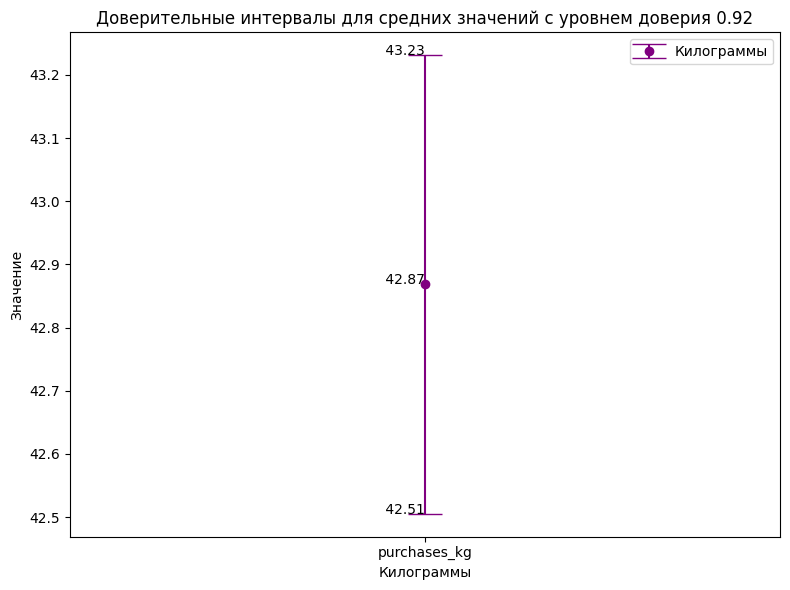

Группа 1: Доверительный интервал для среднего значения [42.51, 43.23], Среднее значение 42.87


In [179]:
# Создаем новую фигуру для построения графика
plt.figure(figsize=(8, 6))

# Строим график для обеих групп
plt.errorbar(x='purchases_kg', y=kg_mean, yerr=margin_of_error_kg, fmt='o', markersize=6, capsize=12, color='purple', label='Килограммы')
plt.xlabel('Килограммы')
plt.ylabel('Значение')
plt.title(f'Доверительные интервалы для средних значений с уровнем доверия {confidence_level}')
plt.legend()
plt.tight_layout()
plt.text('purchases_kg', kg_mean, s=f' {round(kg_mean, 2)}', horizontalalignment='right')
plt.text('purchases_kg', lower_bound_kg, s=f' {round(lower_bound_kg, 2)}', horizontalalignment='right')
plt.text('purchases_kg', upper_bound_kg, s=f' {round(upper_bound_kg, 2)}', horizontalalignment='right')
plt.show()

print(f'Группа 1: Доверительный интервал для среднего значения [{lower_bound_kg:.2f}, {upper_bound_kg:.2f}], Среднее значение {kg_mean:.2f}')

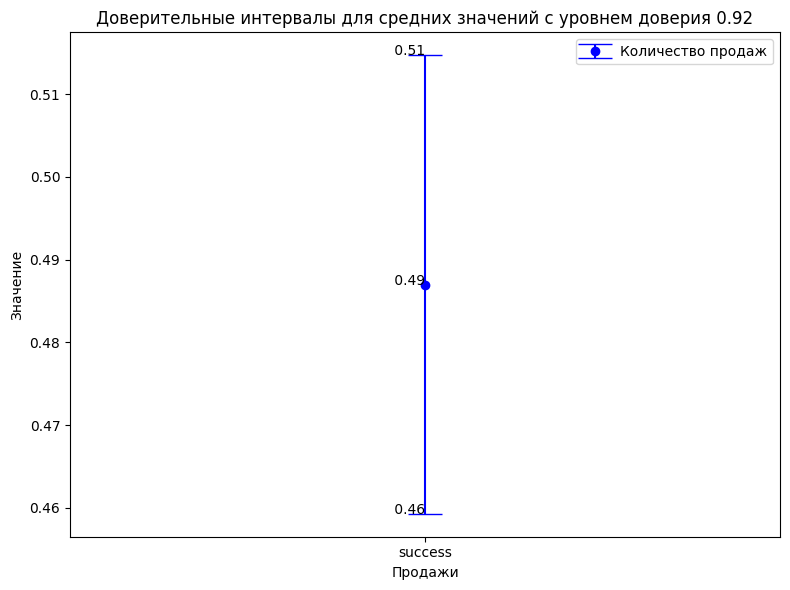

Группа 2: Доверительный интервал для среднего значения [0.46, 0.51], Доля успеха 0.49


In [180]:
# Создаем новую фигуру для построения графика
plt.figure(figsize=(8, 6))

# Строим график для обеих групп
plt.errorbar(x='success', y=p, yerr=margin_of_error_succes, fmt='o', markersize=6, capsize=12, color='blue', label='Количество продаж')
plt.xlabel('Продажи')
plt.ylabel('Значение')
plt.title(f'Доверительные интервалы для средних значений с уровнем доверия {confidence_level_succes}')
plt.legend()
plt.tight_layout()
plt.text('success', p, s=f' {round(p, 2)}', horizontalalignment='right')
plt.text('success', lower_bound_succes, s=f' {round(lower_bound_succes, 2)}', horizontalalignment='right')
plt.text('success', upper_bound_succes, s=f' {round(upper_bound_succes, 2)}', horizontalalignment='right')
plt.show()

print(f'Группа 2: Доверительный интервал для среднего значения [{lower_bound_succes:.2f}, {upper_bound_succes:.2f}], Доля успеха {p:.2f}')

# Вывод

In [195]:
print(f'''Средний вес мешков: {round(kg_mean, 2)}
Доверительный интервал для среднего значения при {confidence_level*100}% уровне доверия: {round(lower_bound_kg,2), round(upper_bound_kg,2)}


Доля успеха: {round(p* 100,2)}%
Доверительный интервал для доли успеха при {confidence_level_succes*100}% уровне доверия: {round(lower_bound_succes,2), round(upper_bound_succes,2)}''')

Средний вес мешков: 42.87
Доверительный интервал для среднего значения при 92.0% уровне доверия: (42.51, 43.23)


Доля успеха: 48.7%
Доверительный интервал для доли успеха при 92.0% уровне доверия: (0.46, 0.51)
